# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [198]:
import numpy as np
from scipy import optimize
import sympy as sp
from sympy import symbols, Eq, solve
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2
import modelproject
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

\begin{align}
y_t - \bar{y} &= \beta_1 \left( e_{t-1}^{r} + \pi^{f} - \pi_t \right) - \beta_2 \left( i^{f} - \pi_{t+1}^{e} - r^{f} \right) + \tilde{z_t}, \quad \text{(1)}\\
 \tilde{z_t} &\equiv \beta_3 \left( g_t - \bar{g} \right)\\
    g_t - \bar{g} &= a \left( \bar{y} - y_t \right), \quad \text{(2)}\\
    \pi_t &= \pi_t^{e} + \gamma \left( y_t - \bar{y} \right) + s_t, \quad \text{(3)}\\
    e_{t}^{r} &= e_{t-1}^{r} + \pi^{f} - \pi_t, \quad \text{(4)}
\end{align}

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

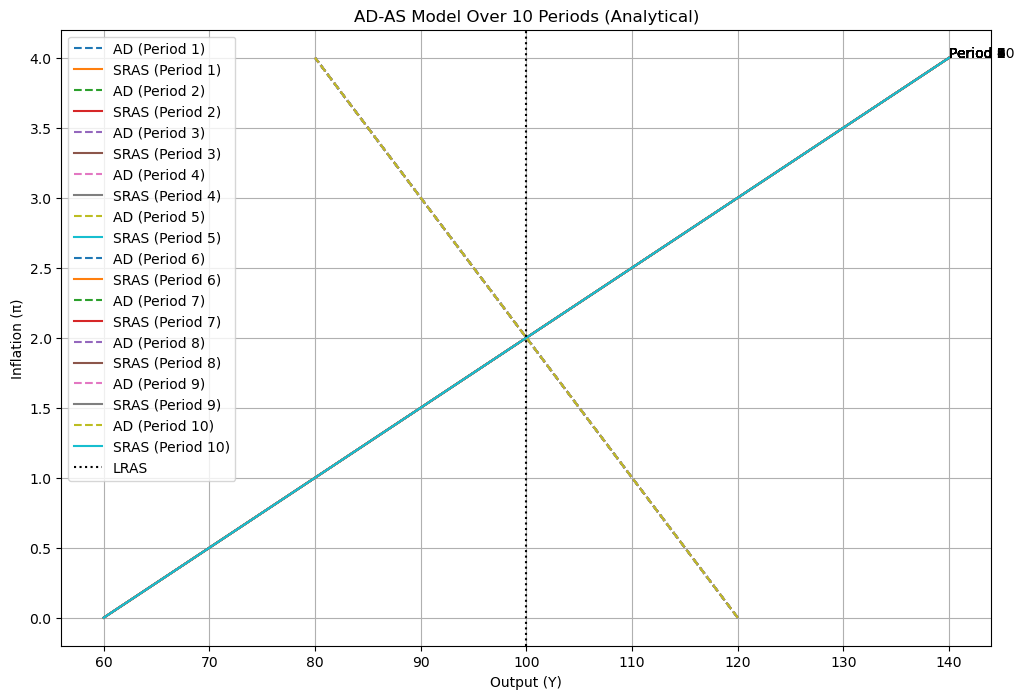

Analytical Intersection Point at Period 10: {output: 100.000000000000, inflation: 2.00000000000000}


In [206]:
# Ensure that s_t remains zero for all periods
model.s_t = 0
model.update_normal_distribution = False  # Disable normal distribution updates

# Set the number of periods for the analytical solution
num_periods = 10

# Plot and find the analytical solution after 10 periods with s_t remaining at zero
intersection_analytical = model.plot_graphs_all_periods_analytical(num_periods)

# Print the analytical intersection point at period 10
print(f"Analytical Intersection Point at Period {num_periods}: {intersection_analytical}")


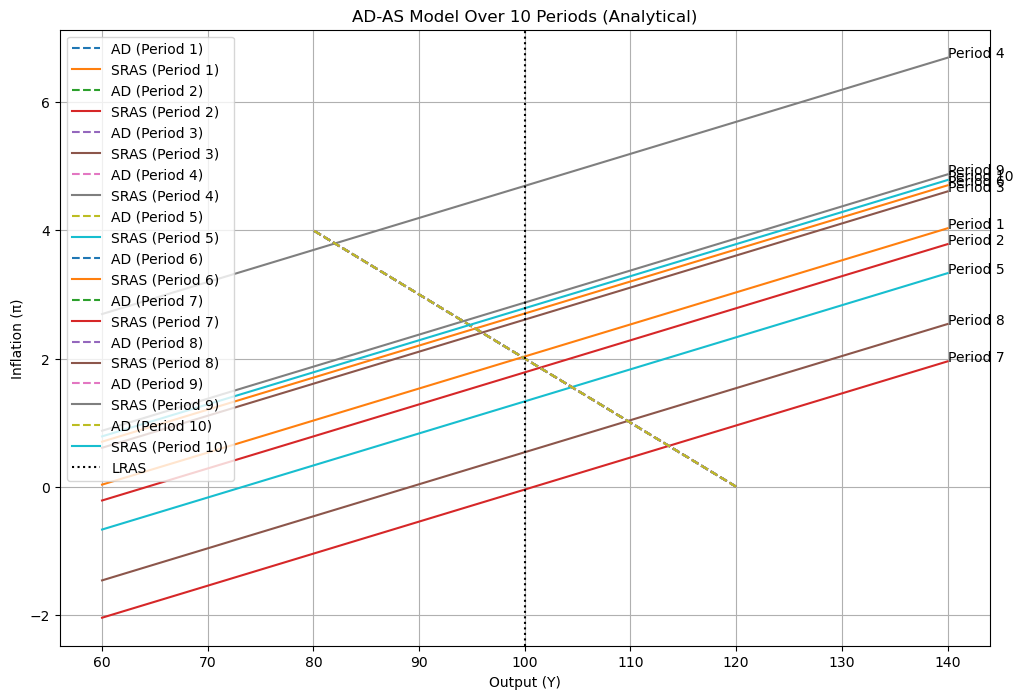

Analytical Intersection Point at Period 10: {output: 94.7626769424358, inflation: 2.52373230575642}


In [207]:
# Enable the normal distribution updates for future calculations
model.update_normal_distribution = True

# Set the number of periods for the analytical solution
num_periods = 10

# Plot and find the analytical solution after enabling normal distribution updates
intersection_analytical = model.plot_graphs_all_periods_analytical(num_periods)

# Print the analytical intersection point at period 10
print(f"Analytical Intersection Point at Period {num_periods}: {intersection_analytical}")


Now the stochastic part of the supply shock is set to be a normal distribution with the mean of 0 and varaince of 1.

TypeError: ADASModel.__init__() missing 1 required positional argument: 'delta'

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

Numerical Intersection Point: [100.   2.]


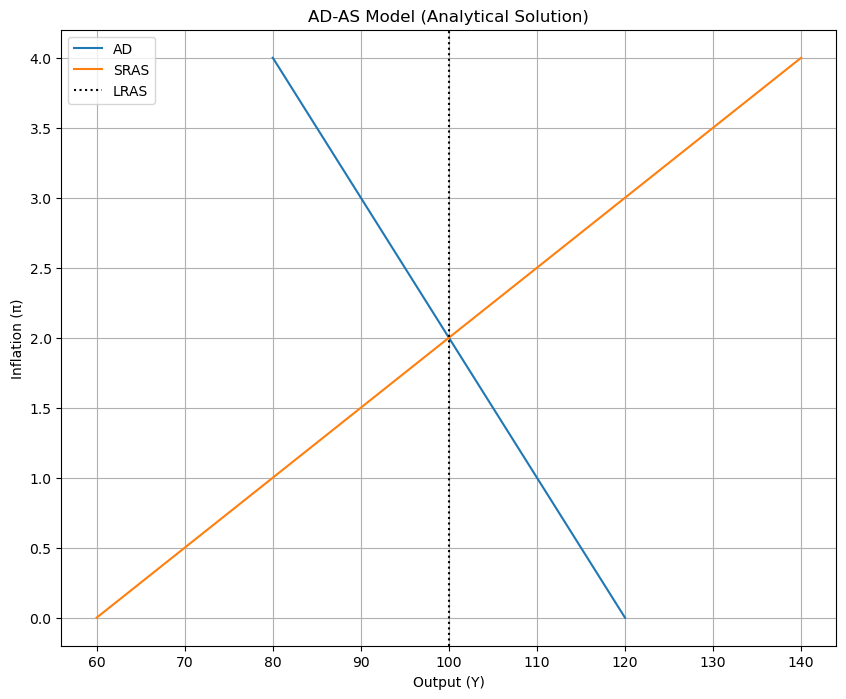

In [193]:




# Ensure that s_t remains zero for all periods
model.s_t = 0

# Set the number of periods for which to find the numerical solution
num_periods = 10

# Plot and find the numerical solution after 10 periods
intersection_numerical = model.plot_graphs_all_periods_numerical(num_periods, initial_guess)

# Print the numerical intersection point at period 10
print(f"Numerical Intersection Point at Period {num_periods}: {intersection_numerical}")


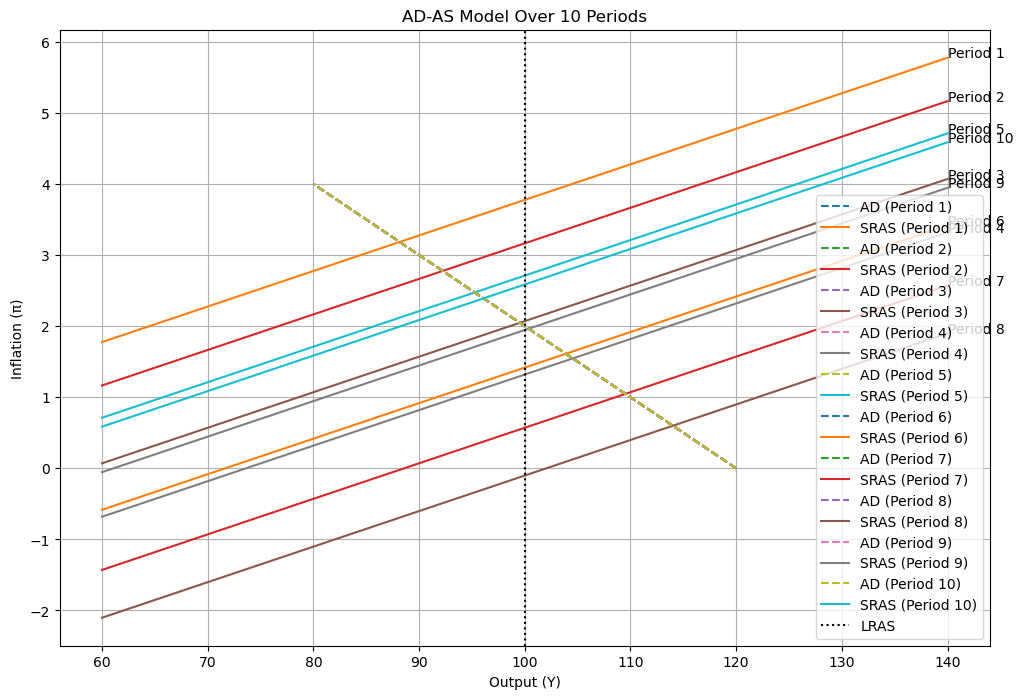

Numerical Intersection Point at Period 10: [96.09462717  2.39053789]


In [192]:
# Enable the normal distribution updates for future calculations
model.update_normal_distribution = True

# Set a new initial guess or reuse the previous one
initial_guess = [100, 2]

# Plot and find the numerical solution after enabling normal distribution updates
num_periods = 10
intersection_numerical = model.plot_graphs_all_periods_numerical(num_periods, initial_guess)

# Print the numerical intersection point at period 10
print(f"Numerical Intersection Point at Period {num_periods}: {intersection_numerical}")


# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 